In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


In [ ]:
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
print(f"Image shape:{image.shape} -> [color_channels, height, width]")
print(f"Image label:{class_names[label]}")

Image shape:torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label:Ankle boot


Image shape


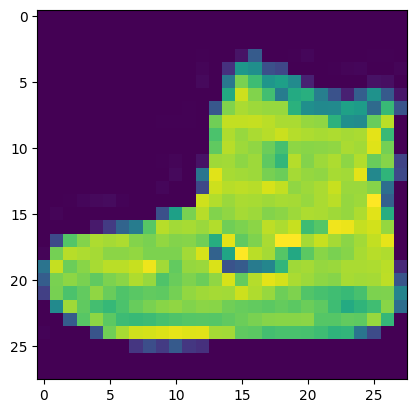

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape")
plt.imshow(image.squeeze())


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

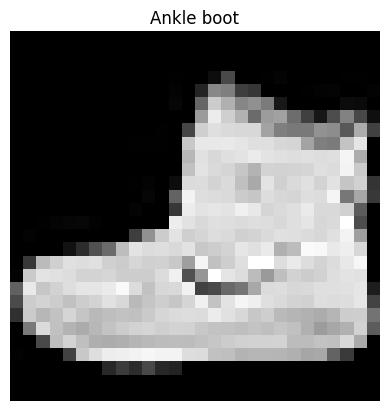

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

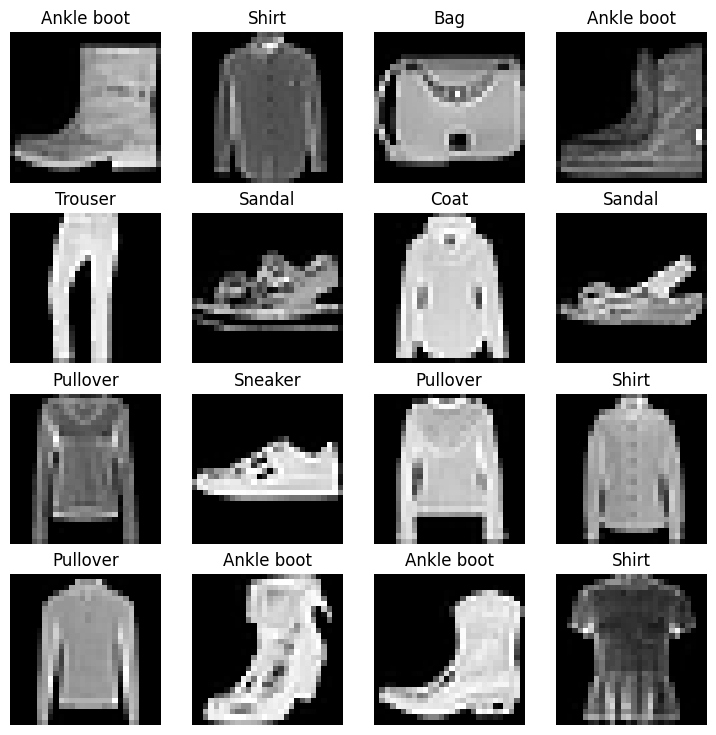

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

In [ ]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c6dc1948f50>,
 <torch.utils.data.dataloader.DataLoader at 0x7c6dc11fa510>)

In [ ]:
print(len(train_dataloader))
print(len(test_dataloader))

1875
313


In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


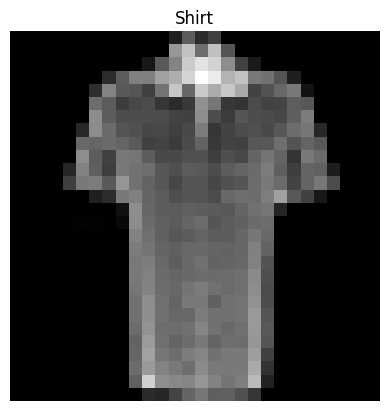

In [ ]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch),size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [ ]:
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

print(f"Shape before flattening: {x.shape}")
print(f"Shape after: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after: torch.Size([1, 784])


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
      super().__init__()
      self.layer_stack = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=input_shape,
                    out_features=hidden_units),
          nn.Linear(in_features=hidden_units,
                    out_features=output_shape)
      )
    def forward(self,x):
      return self.layer_stack(x)


In [ ]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x).shape

torch.Size([1, 10])

In [ ]:
# def accuracy_fn(y_true, y_pred):
#   correct = torch.eq(y_true, y_pred).sum().item()
#   acc = (correct / len(y_pred)) * 100
#   return acc



In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
from timeit import default_timer as timer

def print_train_time(start:float,
                     end:float,
                     device: torch.device= None):
  total_time = end - start
  print(f"Time of training: {device}:{total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()
end_time = timer()
print_train_time(start = start_time, end=end_time, device="cpu")

Time of training: cpu:0.000 seconds


3.7973000019064784e-05

In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm (range(epochs)):
  print(f"Epoch: {epoch}\n----")
  train_loss = 0

  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()

    y_pred = model_0(X)

    loss = loss_fn(y_pred,y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")
  train_loss/=len(train_dataloader)

  test_loss, test_acc = 0,0

  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = model_0(X_test)

      test_loss += loss_fn(test_pred, y_test)

      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    test_loss /=len(test_dataloader)

    test_acc /= len(test_dataloader)

  print(f"\nTrain loss:{train_loss:.4f} | Test loss:{test_loss:.4f}, Test acc:{test_acc:.4f}")

train_time_end_on_cpu = timer()
total_train_data_model_0 = print_train_time(start = train_time_start_on_cpu,
                                            end= train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss:0.5904 | Test loss:0.5102, Test acc:82.0387
Epoch: 1
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss:0.4743 | Test loss:0.5268, Test acc:81.6793
Epoch: 2
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss:0.4537 | Test loss:0.5126, Test acc:82.9972
Time of training: cpu:32.894 seconds


In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      y_pred=model(X)

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results



  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.512529730796814,
 'model_acc': 83.00718849840256}

In [ ]:
!nvidia-smi

Thu Aug 14 05:44:42 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
torch.cuda.is_available()

True

In [ ]:
import torch
device = 'cuda' if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )
  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)




In [ ]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
def train_step(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):

  train_loss, train_acc = 0, 0
  model_0.train()
  for batch, (X,y) in enumerate(data_loader):

    X, y = X.to(device), y.to(device)


    y_pred = model(X)

    loss = loss_fn(y_pred,y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /=len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss:{train_loss:.5f} | Train acc:{train_acc:.2f}%")

train_time_end_on_cpu = timer()
total_train_data_model_0 = print_train_time(start = train_time_start_on_cpu,
                                            end= train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))


Time of training: cpu:34.400 seconds


In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device= device):
  test_loss, test_acc = 0,0

  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      test_pred = model(X)

      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f"Test Loss:{test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [ ]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu=timer()

total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
------
Train loss:1.09199 | Train acc:61.34%
Test Loss:0.95690 | Test acc: 64.98%

Epoch: 1
------
Train loss:0.73779 | Train acc:73.69%
Test Loss:0.72388 | Test acc: 74.21%

Epoch: 2
------
Train loss:0.66776 | Train acc:76.08%
Test Loss:0.68751 | Test acc: 75.64%

Epoch: 3
------
Train loss:0.64469 | Train acc:76.58%
Test Loss:0.65771 | Test acc: 75.63%

Epoch: 4
------
Train loss:0.62655 | Train acc:77.06%
Test Loss:0.65353 | Test acc: 76.22%

Time of training: cuda:55.459 seconds


In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)

      y_pred=model(X)

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
           "model_acc": acc}

# model_0_results = eval_model(model=model_0,
#                              data_loader=test_dataloader,
#                              loss_fn=loss_fn,
#                              accuracy_fn=accuracy_fn)


In [ ]:
 model_1_results = eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6540142297744751,
 'model_acc': 76.19808306709265}

In [ ]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self,x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    return x

In [ ]:
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)
).to(device)

In [ ]:
torch.manual_seed(42)

images = torch.randn(size=(32,3,64,64))
test_image = images[0]

In [ ]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=0
)
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output

tensor([[[[-2.8778e-01, -6.0596e-02, -5.6306e-02,  ...,  2.8654e-01,
            6.6224e-01, -2.3216e-01],
          [-9.8911e-01, -4.0099e-01,  4.1832e-01,  ...,  4.7459e-01,
           -1.8552e-01, -5.7622e-01],
          [-4.1340e-02, -2.3277e-01,  3.7418e-01,  ...,  2.8255e-02,
            1.4923e-01,  1.4236e-01],
          ...,
          [-8.0374e-01, -7.6687e-01, -5.9457e-02,  ...,  1.7452e-01,
            4.2594e-01, -4.8341e-01],
          [-1.4512e-01, -1.1566e-01,  6.1783e-01,  ...,  2.4126e-01,
           -3.6626e-01,  3.5645e-01],
          [ 3.6096e-02,  1.5214e-01,  2.3123e-01,  ...,  3.0904e-01,
           -4.9680e-01, -7.2258e-01]],

         [[-1.0853e+00, -1.6079e+00,  1.3346e-01,  ...,  2.1698e-01,
           -1.7643e+00,  2.5263e-01],
          [-8.2507e-01,  6.3866e-01,  1.8845e-01,  ..., -1.0936e-01,
            4.8068e-01,  8.4869e-01],
          [ 6.4927e-01, -4.2061e-03, -4.9991e-01,  ...,  5.8356e-01,
            2.4611e-01,  6.6233e-01],
          ...,
     

In [ ]:
print(test_image.shape)
print(test_image.unsqueeze(0).shape)

max_pool_layer = nn.MaxPool2d(kernel_size=2)

test_image_through_convo = conv_layer(test_image.unsqueeze(dim=0))
print(test_image_through_convo.shape)

test_image_through_convo_and_max_pool = max_pool_layer(test_image_through_convo)
print(test_image_through_convo_and_max_pool.shape)

torch.Size([3, 64, 64])
torch.Size([1, 3, 64, 64])
torch.Size([1, 10, 62, 62])
torch.Size([1, 10, 31, 31])


In [ ]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0223, -0.0778,  0.0935, -0.0253,  0.0297,  0.0250, -0.0113,  0.0620,
         -0.0835, -0.0153]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
torch.manual_seed(42)
random_tensor = torch.randn(size=(1,1,2,2))
print(random_tensor)
print(random_tensor.shape)

max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_tensor = max_pool_layer(random_tensor)

print(max_pool_tensor)
print(max_pool_tensor.shape)

tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
torch.Size([1, 1, 2, 2])
tensor([[[[0.3367]]]])
torch.Size([1, 1, 1, 1])


In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)


In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs = 50

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n---")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2=timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch:0
---
Train loss:0.69289 | Train acc:74.76%
Test Loss:0.40380 | Test acc: 85.54%

Epoch:1
---
Train loss:0.37156 | Train acc:86.81%
Test Loss:0.40919 | Test acc: 85.19%

Epoch:2
---
Train loss:0.33830 | Train acc:87.99%
Test Loss:0.33097 | Test acc: 88.37%

Epoch:3
---
Train loss:0.31769 | Train acc:88.58%
Test Loss:0.31999 | Test acc: 88.44%

Epoch:4
---
Train loss:0.30284 | Train acc:88.98%
Test Loss:0.33196 | Test acc: 87.62%

Epoch:5
---
Train loss:0.29247 | Train acc:89.38%
Test Loss:0.32149 | Test acc: 88.28%

Epoch:6
---
Train loss:0.28431 | Train acc:89.62%
Test Loss:0.31068 | Test acc: 89.18%

Epoch:7
---
Train loss:0.27396 | Train acc:90.10%
Test Loss:0.30402 | Test acc: 89.06%

Epoch:8
---
Train loss:0.26979 | Train acc:90.11%
Test Loss:0.29202 | Test acc: 89.54%

Epoch:9
---
Train loss:0.26181 | Train acc:90.56%
Test Loss:0.29459 | Test acc: 89.39%

Epoch:10
---
Train loss:0.25792 | Train acc:90.56%
Test Loss:0.29958 | Test acc: 88.96%

Epoch:11
---
Train loss:0.25394

In [ ]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.28731194138526917,
 'model_acc': 90.57507987220447}

In [ ]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results
])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.512530,83.007188
1,FashionMNISTModelV1,0.654014,76.198083
2,FashionMNISTModelV2,0.287312,90.575080


In [ ]:
compare_results["training_time"] = [total_train_data_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.512530,83.007188,34.399693
1,FashionMNISTModelV1,0.654014,76.198083,55.458864
2,FashionMNISTModelV2,0.287312,90.575080,646.521839


Text(0, 0.5, 'model')

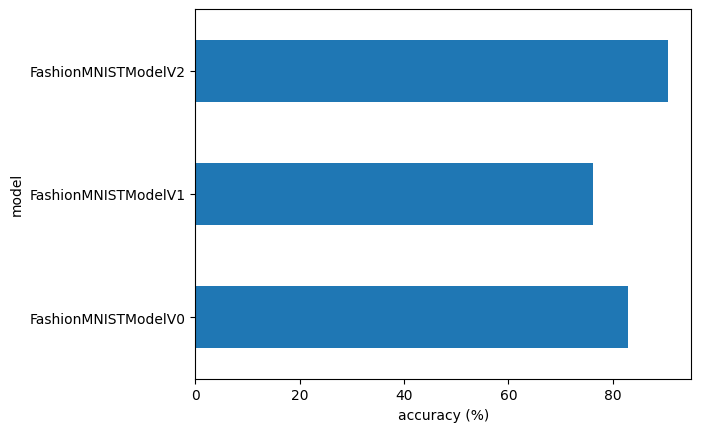

In [ ]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

In [ ]:
def make_predictions(model:torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      pred_logit = model(sample)

      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [ ]:
import random
# random.seed(42)
test_samples=[]
test_labels=[]

for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sneaker')

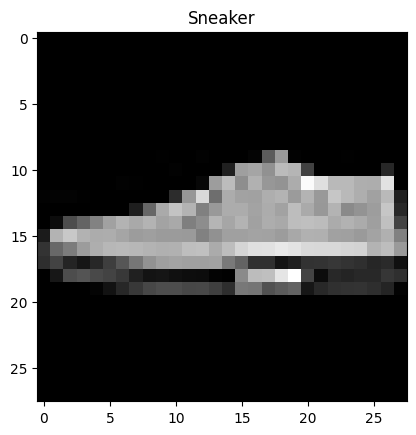

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
pred_probs = make_predictions(model=model_2,
                             data=test_samples)

pred_probs[:10]

tensor([[7.4513e-06, 1.2557e-07, 3.5320e-08, 7.4380e-09, 4.0501e-09, 1.9771e-03,
         2.2711e-08, 9.8014e-01, 4.8092e-04, 1.7396e-02],
        [1.5197e-02, 5.5561e-08, 2.0507e-05, 9.8380e-01, 2.9435e-06, 2.4857e-10,
         9.8357e-04, 2.1579e-08, 9.0547e-08, 7.1342e-09],
        [1.9735e-03, 1.2311e-08, 9.8066e-01, 2.1551e-07, 6.2859e-03, 1.8501e-10,
         1.1080e-02, 7.4445e-11, 2.3505e-10, 1.6523e-09],
        [1.9410e-02, 5.7653e-01, 5.6069e-02, 1.1359e-01, 1.5356e-01, 2.3827e-08,
         8.0828e-02, 1.5933e-06, 4.9554e-08, 2.7520e-06],
        [1.2660e-03, 1.3894e-06, 6.1697e-04, 9.6179e-01, 3.5227e-02, 9.1538e-12,
         8.6856e-04, 2.0383e-09, 2.2633e-04, 5.5674e-10],
        [8.4917e-12, 2.6402e-15, 5.6484e-13, 2.4604e-12, 5.3302e-13, 6.1416e-07,
         1.5630e-08, 2.1518e-09, 7.1443e-09, 1.0000e+00],
        [7.7886e-03, 4.4209e-05, 7.2137e-01, 1.0564e-05, 2.6914e-01, 4.2018e-08,
         1.6326e-03, 6.6484e-09, 9.3752e-06, 1.0811e-05],
        [8.8781e-14, 1.2320

In [ ]:
pred_classes = pred_probs.argmax(dim=1)

pred_classes

tensor([7, 3, 2, 1, 3, 9, 2, 9, 2])

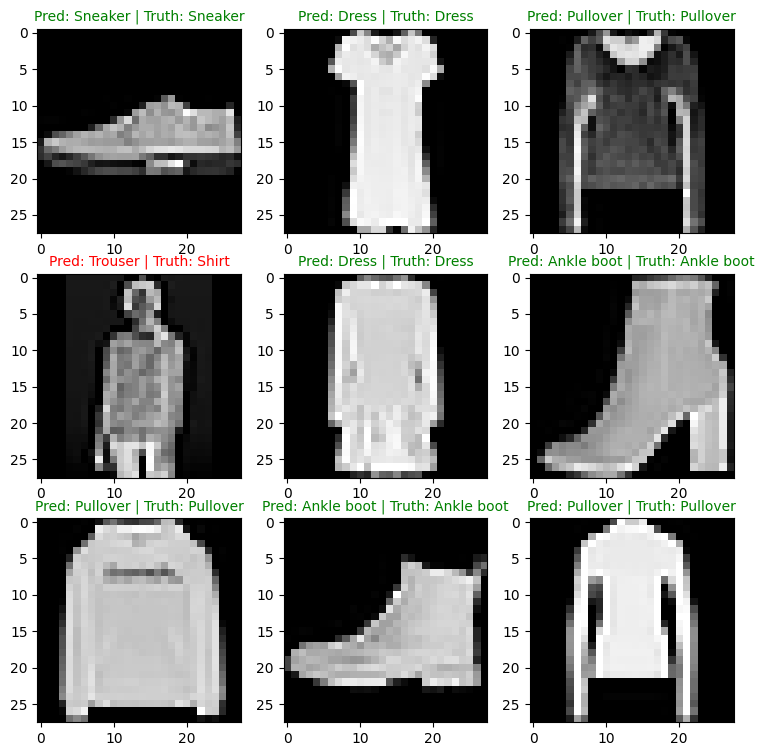

In [ ]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)

  plt.imshow(sample.squeeze(),cmap="gray")

  pred_label = class_names[pred_classes[i]]

  truth_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")



In [ ]:
from tqdm.auto import tqdm

y_preds = []

model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Predictions.."):
    X, y = X.to(device), y.to(device)

    y_logit = model_2(X)

    y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)

    y_preds.append(y_pred.cpu())

print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]


Predictions..:   0%|          | 0/313 [00:00<?, ?it/s]

[tensor([9, 7, 0, 0, 5, 4, 7, 3, 9, 3, 0, 8, 6, 8, 0, 6, 3, 8, 8, 6, 8, 6, 4, 1,
        9, 1, 6, 4, 2, 1, 4, 6]), tensor([2, 7, 2, 6, 8, 9, 6, 9, 9, 5, 1, 7, 9, 6, 3, 4, 0, 2, 3, 2, 6, 7, 3, 2,
        8, 9, 9, 3, 7, 7, 8, 5]), tensor([0, 6, 3, 4, 8, 7, 5, 4, 7, 4, 3, 3, 2, 4, 2, 8, 6, 8, 1, 2, 3, 4, 5, 2,
        0, 9, 9, 8, 6, 2, 6, 3]), tensor([8, 3, 6, 7, 8, 8, 4, 9, 7, 0, 8, 4, 0, 7, 3, 6, 9, 5, 5, 8, 2, 5, 1, 3,
        3, 6, 5, 7, 2, 3, 2, 9]), tensor([5, 6, 1, 8, 8, 9, 9, 5, 6, 7, 3, 9, 8, 1, 3, 8, 7, 3, 4, 6, 6, 6, 3, 7,
        8, 6, 9, 4, 7, 3, 1, 0]), tensor([6, 9, 4, 8, 6, 6, 0, 8, 7, 3, 7, 3, 3, 1, 7, 2, 6, 6, 0, 5, 6, 4, 0, 1,
        4, 8, 6, 5, 2, 2, 0, 1]), tensor([3, 8, 3, 5, 0, 4, 2, 2, 3, 3, 9, 3, 6, 1, 8, 8, 7, 6, 2, 0, 9, 6, 3, 8,
        1, 1, 4, 9, 5, 4, 6, 4]), tensor([9, 8, 8, 1, 9, 2, 2, 2, 2, 8, 8, 7, 4, 5, 3, 1, 8, 3, 9, 8, 0, 3, 0, 6,
        7, 4, 9, 4, 0, 6, 4, 6]), tensor([8, 5, 9, 5, 0, 1, 0, 5, 5, 1, 8, 7, 6, 4, 7, 4, 0, 7, 9, 8, 6, 8, 6, 3,
       

tensor([9, 7, 0, 0, 5, 4, 7, 3, 9, 3])

In [ ]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version:{mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be higher")
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

In [ ]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

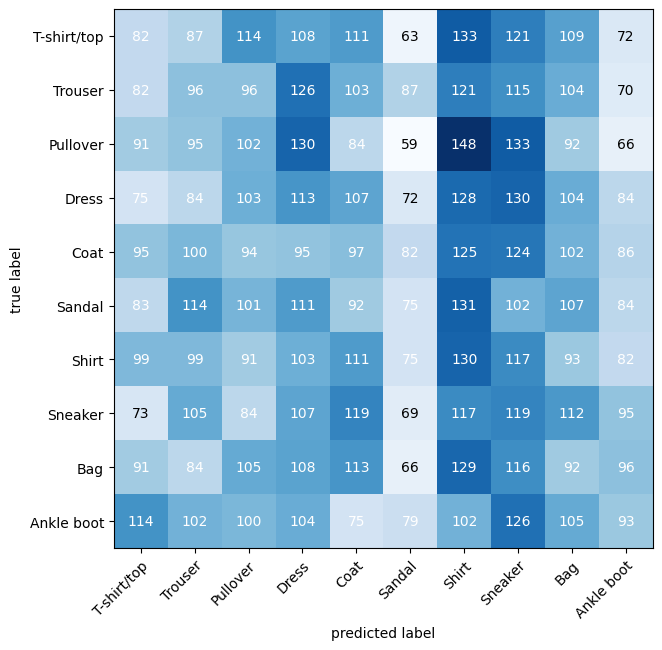

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task="multiclass",num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

In [ ]:
confmat_tensor

tensor([[ 82,  87, 114, 108, 111,  63, 133, 121, 109,  72],
        [ 82,  96,  96, 126, 103,  87, 121, 115, 104,  70],
        [ 91,  95, 102, 130,  84,  59, 148, 133,  92,  66],
        [ 75,  84, 103, 113, 107,  72, 128, 130, 104,  84],
        [ 95, 100,  94,  95,  97,  82, 125, 124, 102,  86],
        [ 83, 114, 101, 111,  92,  75, 131, 102, 107,  84],
        [ 99,  99,  91, 103, 111,  75, 130, 117,  93,  82],
        [ 73, 105,  84, 107, 119,  69, 117, 119, 112,  95],
        [ 91,  84, 105, 108, 113,  66, 129, 116,  92,  96],
        [114, 102, 100, 104,  75,  79, 102, 126, 105,  93]])

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Save model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Save model to: models/03_pytorch_computer_vision_model_2.pth


In [ ]:
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.28731194138526917,
 'model_acc': 90.57507987220447}

In [ ]:
 torch.manual_seed(42)

 loaded_model_2_results = eval_model(
     model=loaded_model_2,
     data_loader=test_dataloader,
     loss_fn=loss_fn,
     accuracy_fn=accuracy_fn
 )

 loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.2871304154396057,
 'model_acc': 90.54512779552715}

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.28731194138526917,
 'model_acc': 90.57507987220447}

In [ ]:
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]))


tensor(False)